In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## Читаем эксель таблицу с оценками за микроэкономику 2 курс

In [2]:
data = pd.read_excel('2022-23.xlsx' , sheet_name = 0)
data.head()

,Unnamed: 0,кр1,доп.балл,кр1 итог,кр1 в 10-балльной,к/р.2,к.р. в 10-балльной,итог,экзамен,итог-итог,кр апрель,кр 3 в 10-балльной,кр май,кр4 в 10-балльной,доклады,ИТОГ,экзамен.1
0,Абаджян Наира,осв,NaN,NaN,0.0,64,7.0,7.0,согласна с оценкой,7.0,28,5,NaN,NaN,9.0,5.15,NaN
1,Агапов Михаил,15,NaN,15.0,2.0,55,6.0,4.0,согласен с оценкой,4.0,NaN,NaN,NaN,NaN,NaN,1.20,NaN
2,Алиев Элвин,41,NaN,41.0,5.0,55,6.0,6.0,согласен с оценкой,6.0,32,5,NaN,NaN,7.0,4.45,NaN
3,Аминева Алина,50,10.0,60.0,7.0,57,6.0,7.0,согласна с оценкой,7.0,17,2,NaN,NaN,9.0,4.40,NaN
4,Антонова Арина,48,NaN,48.0,5.0,75,8.0,7.0,согласна с оценкой,7.0,27,4,NaN,NaN,10.0,5.10,NaN


## Выведем столбец с ФИО студента и оценкой за 3 контрольную в 10 бальной системе

In [3]:
data_cut = data.iloc[:, [0,11]].dropna()
data_cut.head()

,Unnamed: 0,кр 3 в 10-балльной
0,Абаджян Наира,5
2,Алиев Элвин,5
3,Аминева Алина,2
4,Антонова Арина,4
6,Баран Ева,7


In [4]:
data_cut.columns = ['ФИО Студента','кр 3 в 10-балльной']
data_cut.head()

,ФИО Студента,кр 3 в 10-балльной
0,Абаджян Наира,5
2,Алиев Элвин,5
3,Аминева Алина,2
4,Антонова Арина,4
6,Баран Ева,7


## Уберем из данных тех, кто был освобожден по болезни

In [5]:
data_wth_sick = data_cut.loc[data_cut['кр 3 в 10-балльной'] != 'осв']
data_wth_sick.head()

,ФИО Студента,кр 3 в 10-балльной
0,Абаджян Наира,5
2,Алиев Элвин,5
3,Аминева Алина,2
4,Антонова Арина,4
6,Баран Ева,7


## Сгруппируем оценки и посчитаем количество студентов с этими отметками

In [6]:
data_for_viz= data_wth_sick.groupby('кр 3 в 10-балльной').count().reset_index()
data_for_viz.columns = ['кр 3 в 10-балльной' , 'Количество студентов']
data_for_viz

,кр 3 в 10-балльной,Количество студентов
0,1,3
1,2,1
2,3,8
3,4,2
4,5,8
5,6,10
6,7,9
7,8,5
8,9,4
9,10,2


## Визуализируем данные в координатах ("кр 3 в 10-бальной" , "Количество студентов") чтобы посмотреть на распределение оценок

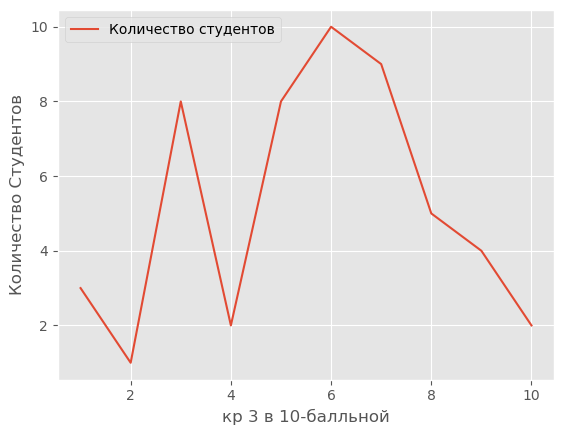

In [7]:
data_for_viz.plot(x = 'кр 3 в 10-балльной' , y = 'Количество студентов');
plt.ylabel('Количество Студентов');

## Для наглядности построим гистограмму

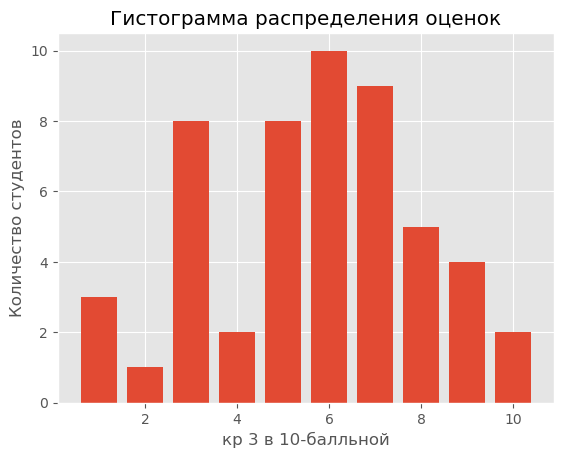

In [8]:
plt.bar(data_for_viz['кр 3 в 10-балльной'], data_for_viz['Количество студентов'])
plt.xlabel('кр 3 в 10-балльной')
plt.ylabel('Количество студентов')
plt.title('Гистограмма распределения оценок')
plt.show()